# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Explore unknown JSON schemas
* Access and manipulate data inside a JSON file
* Convert JSON to alternative data formats

## Loading the JSON file

Load the data from the file disease_data.json.

In [89]:
import json
data = json.load(open("disease_data.json"))

## Explore the first and second levels of the schema hierarchy

In [90]:
for key1 in data.keys():
    print(key1, type(data[key1]))

meta <class 'dict'>
data <class 'list'>


In [91]:
data['meta'].keys()

dict_keys(['view'])

In [92]:
len(data['data'])

60266

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [93]:
len(data['meta']['view'])

40

In [94]:
data['meta']['view']['columns']

[{'id': -1,
  'name': 'sid',
  'dataTypeName': 'meta_data',
  'fieldName': ':sid',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'id',
  'dataTypeName': 'meta_data',
  'fieldName': ':id',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'position',
  'dataTypeName': 'meta_data',
  'fieldName': ':position',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_at',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_meta',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_meta',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'updated_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':updated_at'

In [95]:
import pandas as pd
df = pd.DataFrame(data['data'])
df.columns = [x['name'] for x in data['meta']['view']['columns']]
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [96]:
df.columns

Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [97]:
df['LocationDesc'].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Guam', 'Puerto Rico',
       'Virgin Islands'], dtype=object)

In [98]:
df['DataValueType'].unique()

array(['Crude Prevalence', 'Age-adjusted Prevalence', 'Mean',
       'Age-adjusted Mean', 'Percent', 'Yes/No'], dtype=object)

In [99]:
df['Stratification1'].unique()

array(['Overall', 'Male', 'Female', 'White, non-Hispanic',
       'Black, non-Hispanic', 'Hispanic', 'Other, non-Hispanic',
       'Multiracial, non-Hispanic', 'American Indian or Alaska Native',
       'Asian, non-Hispanic'], dtype=object)

In [100]:
df['StratificationCategory1'].unique()

array(['Overall', 'Gender', 'Race/Ethnicity'], dtype=object)

In [101]:
for column in df.columns:
    print(column, df[column].unique())

sid [     1      2      3 ... 519705 519706 519707]
id ['FF49C41F-CE8D-46C4-9164-653B1227CF6F'
 'F4468C3D-340A-4CD2-84A3-DF554DFF065E'
 '65609156-A343-4869-B03F-2BA62E96AC19' ...
 '02896705-4A9F-45A2-A84B-923DEA6DC6A2'
 '4DF2E74C-5043-474B-9739-98B4D8736BDB'
 'D742712D-EAFE-401B-83BB-AB93F597E907']
position [     1      2      3 ... 519705 519706 519707]
created_at [1527194521 1527194522 1527194523 1527194524 1527194529 1527194525
 1527194530 1527194532 1527194527 1527194526 1527194528 1527194531
 1527194534 1527194533 1527194535 1527194583 1527194584 1527194640
 1527194643 1527194644]
created_meta ['959778']
updated_at [1527194521 1527194522 1527194523 1527194524 1527194529 1527194525
 1527194530 1527194532 1527194527 1527194526 1527194528 1527194531
 1527194534 1527194533 1527194535 1527194583 1527194584 1527194640
 1527194643 1527194644]
updated_meta ['959778']
meta [None]
YearStart ['2016']
YearEnd ['2016']
LocationAbbr ['US' 'AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' '

DataValueAlt ['16.9' '13' '18.2' '15.6' '15' '16.3' '19' '16.7' '17' '25.6' '15.5'
 '13.3' '18.6' '16.1' '19.9' '17.5' '21.2' '16' '14.6' '18.3' '15.3'
 '17.8' '21.3' '12.3' '18.4' '18.9' '20' '15.8' '18' '24.8' '17.9' '11.8'
 '19.4' '16.8' '19.3' '13.1' '12.5' '16.4' '11.3' '24.6' '20.7' '15.2'
 '13.8' '16.5' '15.9' '19.5' '18.1' '24.2' '13.6' '19.6' '18.5' '22.5'
 '17.3' '21.1' '20.2' '22.3' '12.8' '20.6' '16.6' '19.8' '17.2' '15.7'
 '25.2' '17.4' '20.9' '14.1' '12' '20.3' '12.7' '26' '19.1' '13.4' '21.9'
 '17.6' '21' '21.5' '30.5' '20.1' '24.3' '23.3' '27.1' '21.8' '20.5'
 '22.4' '23.4' '24' '26.5' '23.6' '24.9' '27.2' '23.1' '20.8' '22.7'
 '32.1' '23.5' '25.3' '22.9' '24.4' '29.7' '29.8' '24.5' '21.6' '28.4'
 '21.4' '24.7' '23.9' '28.3' '26.3' '25.1' '27.3' '26.7' '27.9' '32'
 '23.8' '25.5' '30.7' '29.6' '8.8' '15.1' '10.1' '9.8' '11.2' '13.9'
 '11.9' '13.7' '9.7' '14.5' '12.1' '15.4' '10.4' '9.2' '11.7' '11.4'
 '14.4' '16.2' '7.1' '13.5' '13.2' '9.5' '10.7' '7.7' '11.1' '14.3' '8.

TypeError: unhashable type: 'list'

In [ ]:
for topic in df['Topic'].unique():
    if 'sthma' in topic:
        print(topic)

In [102]:
for topic in df['Question'].unique():
    if 'sthma' in topic:
        print(topic)

Current asthma prevalence among adults aged >= 18 years
Asthma prevalence among women aged 18-44 years
Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma
Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma


In [103]:
asthma_df = df[(df['Question'] == "Current asthma prevalence among adults aged >= 18 years")]

In [104]:
asthma_df['DataValueType'].unique()

array(['Crude Prevalence', 'Age-adjusted Prevalence'], dtype=object)

In [105]:
len(asthma_df['LocationDesc'].unique())

55

In [106]:
len(asthma_df[(asthma_df['StratificationID1'] == "OVR") &
          (asthma_df['DataValueTypeID'] == "CRDPREV")])

55

In [107]:
prev_asthma_df = asthma_df[(asthma_df['StratificationID1'] == "OVR") &
          (asthma_df['DataValueTypeID'] == "CRDPREV")]

In [108]:
sum(asthma_df['DataValueType'] == "Age-adjusted Prevalence")

435

In [109]:
%matplotlib inline

In [110]:
prev_asthma_df

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
9370,9368,DA78CA14-AF4B-49EA-9B9D-5D01C233A286,9368,1527194523,959778,1527194523,959778,None,2016,2016,...,59,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9371,9369,6BEC61D0-E04B-44BA-8170-F7D6A4C40A09,9369,1527194523,959778,1527194523,959778,None,2016,2016,...,01,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9372,9370,5D6EDDA9-B241-4498-A262-ED20AB78C44C,9370,1527194523,959778,1527194523,959778,None,2016,2016,...,02,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9373,9371,5FCE0D49-11FD-4545-B9E7-14F503123105,9371,1527194523,959778,1527194523,959778,None,2016,2016,...,04,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9374,9372,68F151CE-3084-402C-B672-78A43FBDE287,9372,1527194523,959778,1527194523,959778,None,2016,2016,...,05,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9375,9373,D3F00ED2-A069-4E40-B42B-5A2528A91B6F,9373,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9376,9374,A8B4F198-D388-4663-B82B-936C5FB37428,9374,1527194523,959778,1527194523,959778,None,2016,2016,...,08,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9377,9375,B2FB1AEA-5E2A-4E7C-9A93-586EA18EBE99,9375,1527194523,959778,1527194523,959778,None,2016,2016,...,09,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9378,9376,7C5D70DE-DE95-4AAD-A666-2260B5A16363,9376,1527194523,959778,1527194523,959778,None,2016,2016,...,10,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9379,9377,1893C9A3-C6CE-4F47-A66F-85A4F89F244F,9377,1527194523,959778,1527194523,959778,None,2016,2016,...,11,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None


In [111]:
prev_asthma_df['DataValue'] = prev_asthma_df['DataValue'].astype(float)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
prev_asthma_df['DataValue']

9370     9.3
9371     9.7
9372     8.8
9373     9.4
9374     8.5
9375     7.8
9376     8.8
9377    10.5
9378     8.5
9379     9.8
9380     6.7
9381     8.5
9382    10.7
9383     9.3
9384     8.9
9385    10.2
9386     7.8
9387     8.8
9388    11.6
9389     8.3
9390    12.2
9391     9.4
9392    10.3
9393    10.9
9394     7.6
9395     8.0
9396     9.9
9397     8.5
9398     8.3
9399     7.9
9400    11.4
9401     8.2
9402    11.8
9403     9.5
9404     8.0
9405     9.0
9406     9.7
9407    10.0
9408    10.5
9409    10.6
9410    10.7
9411     8.8
9412     6.2
9413    10.9
9414     7.6
9415     8.2
9416    10.2
9417     8.6
9418     9.6
9419    11.8
9420     8.5
9421     9.5
9422     5.1
9423    10.7
9424     6.3
Name: DataValue, dtype: float64

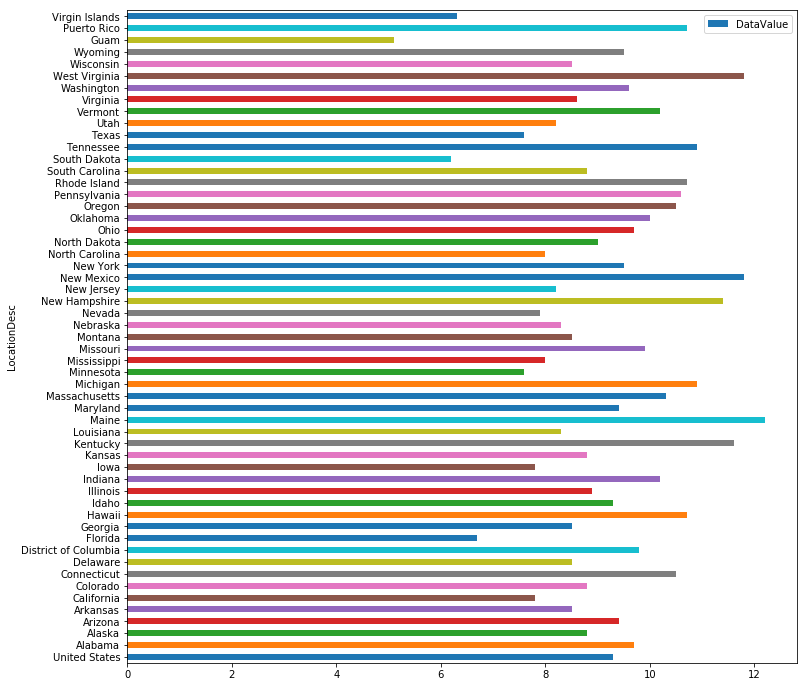

In [113]:
prev_asthma_df.plot.barh(x="LocationDesc", y="DataValue", figsize=(12,12))

## Level-Up!
## Create a function (or class) that returns an outline of the schema structure like this: 
<img src="images/outline.jpg" width="350">

Rules:
* Your outline should follow the numbering outline above (I, A, 1, a, i).
* Your outline should be properly indented! (Four spaces or one tab per indentation level.)
* Your function goes to at least a depth of 5 (Level-up: create a parameter so that the user can specify this)
* If an entry is a dictionary, list its keys as the subheadings
* After listing a key name (where applicable) include a space, a dash and the data type of the entry
* If an entry is a dict or list put in parentheses how many items are in the entry
* lists will not have key names for their entries (they're just indexed)
* For subheadings of a list, state their datatypes. 
* If a dictionary or list is more then 5 items long, only show the first 5 (we want to limit our previews); make an arbitrary order choice for dictionaries. (Level-up: Parallel to above; allow user to specify number of items to preview for large subheading collections.)

In [145]:
# Your code here; you will probably want to define subfunctions.
def print_obj_outline(json_obj):
    def print_item(item, recursion_level):
        if recursion_level > 2:
            pass
        outline = ""
        if type(item) == dict:
            for key, value in item.items():
                outline += print_item(value, recursion_level+1)
        else:
            outline += f"{item} {type(item)}\n"
        return outline
    
    outline = print_item(json_obj,1)
    return outline

In [146]:
outline = print_obj_outline(data)

In [147]:
print(outline) #Your function should produce the following output for this json object (and work for all json files!)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
print(outline) #Your function should produce the following output for this json object (and work for all json files!)

I. root - <class 'dict'> (2 items)
    A. meta <class 'dict'> (1 items)
        1. view <class 'dict'> (40 items)
            a. id <class 'str'> 
            b. name <class 'str'> 
            c. attribution <class 'str'> 
            d. attributionLink <class 'str'> 
            e. averageRating <class 'int'> 
    B. data <class 'list'> (60266 items)
        1. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        2. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        3. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        4. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <c

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files and writing a recursive generalized function for outlining a JSON file's schema! 